## Task 4: Exploratory Data Analysis - Terrorism


#### By: Gowtham Saini

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
terror_dt=pd.read_csv("terrorism_dt.csv",encoding='latin1')

C:\Users\sgowt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [11]:
terror_dt.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [12]:
print(*terror_dt.columns,sep=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

In [13]:
terror_dt["country_txt"].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

In [14]:
terror_dt["region_txt"].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [15]:
terror_dt.groupby(["country_txt","region_txt"])["region_txt"].agg('count').sort_values(ascending=False).head(10)

country_txt     region_txt                 
Iraq            Middle East & North Africa     24636
Pakistan        South Asia                     14368
Afghanistan     South Asia                     12731
India           South Asia                     11960
Colombia        South America                   8306
Philippines     Southeast Asia                  6908
Peru            South America                   6096
El Salvador     Central America & Caribbean     5320
United Kingdom  Western Europe                  5235
Turkey          Middle East & North Africa      4292
Name: region_txt, dtype: int64

In [16]:
top5=pd.DataFrame(terror_dt.groupby(["country_txt","region_txt"])["region_txt"].agg('count'))

In [17]:
top5.columns=["count"]
top5=top5.reset_index(drop=False)

In [18]:
top5[top5["region_txt"]=="Middle East & North Africa"].sort_values(by=["count"],ascending=False).head(5)

,country_txt,region_txt,count
84,Iraq,Middle East & North Africa,24636
183,Turkey,Middle East & North Africa,4292
200,Yemen,Middle East & North Africa,3347
2,Algeria,Middle East & North Africa,2743
51,Egypt,Middle East & North Africa,2479


#### From the numbers shown above, it is clear that Middle East & North Africa have the highest terror attacks. Top 5 countries in these regions are:
1. Iraq - 24,636
2. Turkey - 4,292
3. Yemen - 3,347
4. Algeria - 2,743
5. Egypt - 2,479

C:\Users\sgowt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


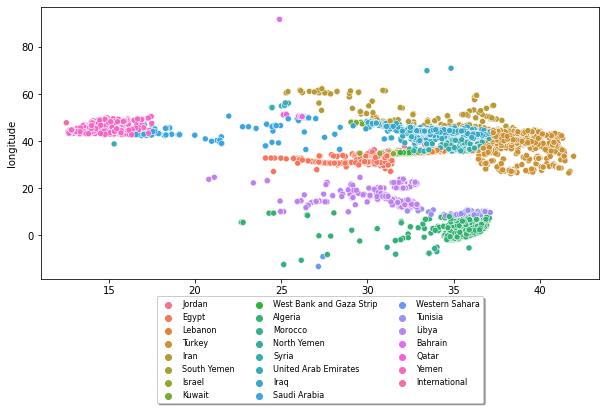

In [19]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot( "latitude","longitude",data=terror_dt[terror_dt["region"]==10],hue="country_txt",
                palette="husl")
# plt.legend(loc="right")
x_size = 8
y_size = 5
size = 8
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3, fontsize = size)


### Let's investigate terror attacks in Iraq

In [20]:
iraq=terror_dt[terror_dt["country_txt"]=="Iraq"]

In [21]:
iraq.shape

(24636, 135)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

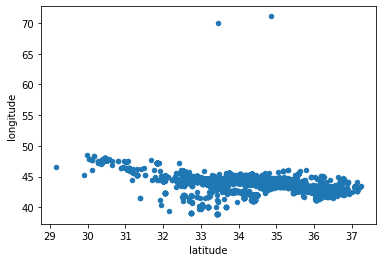

In [22]:
iraq.plot( x="latitude", y="longitude",kind="scatter",\
        colormap="YlOrRd")

In [23]:
iraq["city"].value_counts().head(10)

Baghdad         7585
Mosul           2265
Kirkuk           925
Baqubah          745
Fallujah         579
Unknown          562
Ramadi           509
Tikrit           418
Abu Ghraib       324
Tuz Khormato     277
Name: city, dtype: int64

### Top 5 terrorism cities in Iraq:
1. Baghdad                   
2. Mosul
3. Kirkuk
4. Baqubah
5. Fallujah

### As seen in the below analysis, highest terror attacks are using bombs/explosions followed by armed assault. 

In [24]:
iraq["attacktype1_txt"].value_counts()

Bombing/Explosion                      18286
Armed Assault                           3155
Assassination                           1287
Hostage Taking (Kidnapping)              946
Unknown                                  765
Facility/Infrastructure Attack           154
Hostage Taking (Barricade Incident)       24
Hijacking                                 13
Unarmed Assault                            6
Name: attacktype1_txt, dtype: int64

#### Out of approximately 18k bomb attacks in Iraq, 6313 happened in Baghbad, 1349 in Mosul, 621 in Kiruk, 514 in Baqubah, 418 in Fallujah all of which are among the top 5 cities with highest terror attacks. Almost 50% of the bombing/explosion  attacks happened in these top 5 cities.  

In [25]:
iraq.groupby([ "city","attacktype1_txt"])["attacktype1_txt"].agg('count').sort_values(ascending=False).head(20)

city          attacktype1_txt  
Baghdad       Bombing/Explosion    6313
Mosul         Bombing/Explosion    1349
Baghdad       Armed Assault         729
Kirkuk        Bombing/Explosion     621
Baqubah       Bombing/Explosion     514
Mosul         Armed Assault         498
Fallujah      Bombing/Explosion     418
Ramadi        Bombing/Explosion     377
Baghdad       Assassination         366
Unknown       Bombing/Explosion     338
Tikrit        Bombing/Explosion     292
Abu Ghraib    Bombing/Explosion     254
Madain        Bombing/Explosion     240
Tuz Khormato  Bombing/Explosion     223
Mahmudiyah    Bombing/Explosion     202
Taji          Bombing/Explosion     187
Tarmiyah      Bombing/Explosion     175
Samarra       Bombing/Explosion     171
Mosul         Assassination         158
Kirkuk        Armed Assault         154
Name: attacktype1_txt, dtype: int64

#### Private properties and citizens are the main victims of the terror attacks. Surprisingly, government officials are the next highest target.  

In [26]:
iraq["targtype1_txt"].value_counts().head(20)

Private Citizens & Property       8747
Police                            3682
Military                          3333
Government (General)              2216
Business                          2112
Unknown                           1286
Terrorists/Non-State Militia       958
Religious Figures/Institutions     661
Transportation                     472
Utilities                          337
Educational Institution            271
Journalists & Media                178
Government (Diplomatic)            127
Violent Political Party             79
Other                               60
Airports & Aircraft                 32
NGO                                 28
Food or Water Supply                25
Telecommunication                   21
Tourists                             9
Name: targtype1_txt, dtype: int64

In [27]:
iraq["weaptype1_txt"].value_counts()

Explosives                                                                     18925
Firearms                                                                        4230
Unknown                                                                         1225
Incendiary                                                                       125
Melee                                                                             71
Chemical                                                                          47
Other                                                                              9
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)        2
Sabotage Equipment                                                                 2
Name: weaptype1_txt, dtype: int64

In [28]:
temp=pd.DataFrame(iraq.groupby(["weaptype1_txt","targtype1_txt"])["weaptype1_txt"].agg('count').sort_values(ascending=False))

In [29]:
temp.columns=["count"]
temp=temp.reset_index(drop=False)

#### Almost 90% of citizens and private properties are attacked by explosives (7287 out of 8747). Same goes for police and military officials. As we can see in the below analysis, explosives and firearms attacks are the highest on any kind of weapons used.

In [30]:
temp.head(20)

,weaptype1_txt,targtype1_txt,count
0,Explosives,Private Citizens & Property,7287
1,Explosives,Police,2604
2,Explosives,Military,2294
3,Explosives,Business,1837
4,Explosives,Government (General),1338
5,Explosives,Unknown,1279
6,Firearms,Police,923
7,Firearms,Private Citizens & Property,858
8,Firearms,Government (General),809
9,Firearms,Military,669


#### We can also say people getting killed in a chemical attacks are lesser than being killed whereas the number of people wounded and killed by explosives is almost the same. A lot of people are getting killed by firearms than they are being wounded. This tells us that the most prominent attacks  in Iraq is firearms and explosives. The government needs to take strict actions to mitigate these numbers in order to reduce the terror attacks and protect its citizens and government officials from being attacked. 

In [31]:
iraq.groupby(["weaptype1_txt"])["nwound"].agg('max').sort_values(ascending=False)

weaptype1_txt
Chemical                                                                       1500.0
Explosives                                                                      750.0
Incendiary                                                                      600.0
Firearms                                                                        147.0
Melee                                                                            50.0
Unknown                                                                          41.0
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       0.0
Sabotage Equipment                                                                0.0
Other                                                                             0.0
Name: nwound, dtype: float64

In [32]:
iraq.groupby(["weaptype1_txt"])["nkill"].agg('max').sort_values(ascending=False)

weaptype1_txt
Firearms                                                                       1570.0
Unknown                                                                         953.0
Explosives                                                                      670.0
Incendiary                                                                       49.0
Chemical                                                                         36.0
Other                                                                            30.0
Melee                                                                            17.0
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1.0
Sabotage Equipment                                                                0.0
Name: nkill, dtype: float64

#### Highest number of suicides are also happening in Middle East & North African countries. Among which Iraq is on the top followed by Afganistan

In [33]:
terror_dt.groupby(["region_txt","suicide"])["suicide"].agg('count').sort_values(ascending=False)

region_txt                   suicide
Middle East & North Africa   0          46702
South Asia                   0          43048
South America                0          18972
Sub-Saharan Africa           0          16810
Western Europe               0          16616
Southeast Asia               0          12457
Central America & Caribbean  0          10343
Eastern Europe               0           5052
Middle East & North Africa   1           3772
North America                0           3440
South Asia                   1           1926
East Asia                    0            785
Sub-Saharan Africa           1            740
Central Asia                 0            552
Australasia & Oceania        0            281
Eastern Europe               1             92
Southeast Asia               1             28
Western Europe               1             23
East Asia                    1             17
North America                1             16
Central Asia                 1             

In [34]:
terror_dt.groupby(["country_txt","suicide"])["suicide"].agg('count').sort_values(ascending=False).head(50)

country_txt                       suicide
Iraq                              0          22034
Pakistan                          0          13857
India                             0          11900
Afghanistan                       0          11503
Colombia                          0           8302
Philippines                       0           6899
Peru                              0           6096
El Salvador                       0           5320
United Kingdom                    0           5228
Turkey                            0           4216
Somalia                           0           3954
Thailand                          0           3849
Nigeria                           0           3518
Spain                             0           3247
Yemen                             0           3127
Sri Lanka                         0           2908
United States                     0           2822
Algeria                           0           2710
France                            0     